In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import decomposition
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA, IncrementalPCA
import seaborn as sb
%matplotlib inline
import pandas as pd
from get_SAB import *
import copy
from matplotlib.colors import LogNorm


In [17]:
sb.set(font_scale=1.2,style="whitegrid") #set styling preferences

info = {}
info2 = {}
maxSAB = 0.0
with open('leaprRun/tape24','r') as f:
    lines = [line for line in f.readlines() if line[71:75] == '7  4']

    nbeta  = getVal(lines[4],5,'int')
    nalpha = getVal(lines[6],5,'int')
    numAlphaLines = ceil(nalpha/3)
    lines = lines[6:]

    for ibeta in range(nbeta):
        offset = 2
        beta = getVal(lines[0],1)
        alphas, sab = [], []
        for i in range(numAlphaLines):
            for j in range(3):
                alphas.append(getVal(lines[offset+i],2*j  ))
                sabVal = getVal(lines[offset+i],2*j+1)
                sabVal = np.log(sabVal) if sabVal > 1e-9 else -20
                sab.append(sabVal)
                if sab[-1] > maxSAB:
                    maxSAB = sab[-1]
        info[beta] = [alphas,sab]
        info2[beta] = sab
        lines = lines[numAlphaLines+offset:]

    betas = (list(info.keys()))
    
df = pd.DataFrame(data=info2)


In [18]:
from sklearn.preprocessing import StandardScaler
features = betas
original_data = df.loc[:, features].values
scaler       = StandardScaler().fit(original_data)
std_scaled_x = scaler.transform(original_data)
# print(std_scaled_x.mean(axis=0))
# print(std_scaled_x.std(axis=0))


In [19]:
# principalComponents = pca.fit_transform(x)
# principalDf = pd.DataFrame(data = principalComponents
#              , columns = ['principal component 1'])


### Create Covariance Matrix

In [20]:
covar_matrix = PCA(n_components=40)
covar_matrix.fit(std_scaled_x)
#calculate variance ratios
# variance = covar_matrix.explained_variance_ratio_ 
var = np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=6)*100)
print('Cumulative sum of variance explained with n features:')
print(var)

Cumulative sum of variance explained with n features:
[75.504  93.1103 96.799  97.8989 98.7514 99.1376 99.3895 99.5687 99.669
 99.7461 99.8006 99.8407 99.876  99.91   99.9274 99.9412 99.9503 99.9589
 99.9665 99.9726 99.9772 99.9805 99.9834 99.9854 99.9872 99.9887 99.9899
 99.991  99.992  99.993  99.9938 99.9946 99.9954 99.996  99.9966 99.997
 99.9974 99.9978 99.9981 99.9984]


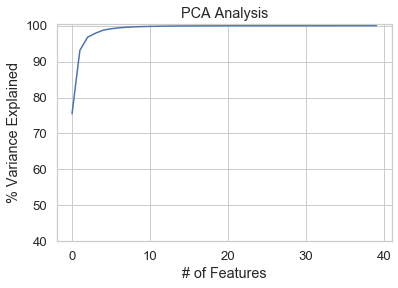

In [21]:
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(40,100.5)
plt.style.context('seaborn-whitegrid')
plt.plot(var)

### Should probably choose 10 features

Number of components explaining 99.99% variance: 27


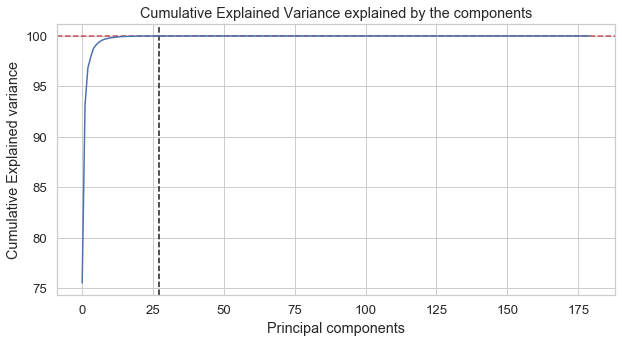

In [22]:
pca = PCA()
pca.fit(std_scaled_x)
desired_precision = 99.99
var_cumu = np.cumsum(pca.explained_variance_ratio_)*100

k = np.argmax(var_cumu>desired_precision)
print("Number of components explaining "+str(desired_precision)+"% variance: "+ str(k))

plt.figure(figsize=[10,5])
plt.title('Cumulative Explained Variance explained by the components')
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components')
plt.axvline(x=k, color="k", linestyle="--")
plt.axhline(y=desired_precision, color="r", linestyle="--")
ax = plt.plot(var_cumu)

-5.127313583299727
2.7984175302615872
-5.127311899734912
2.798419682566254


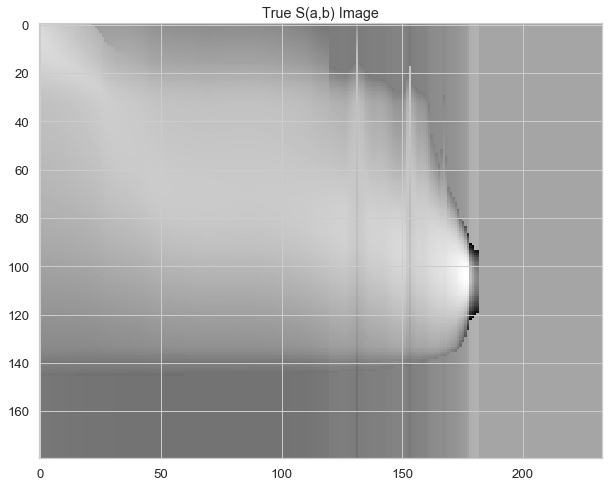

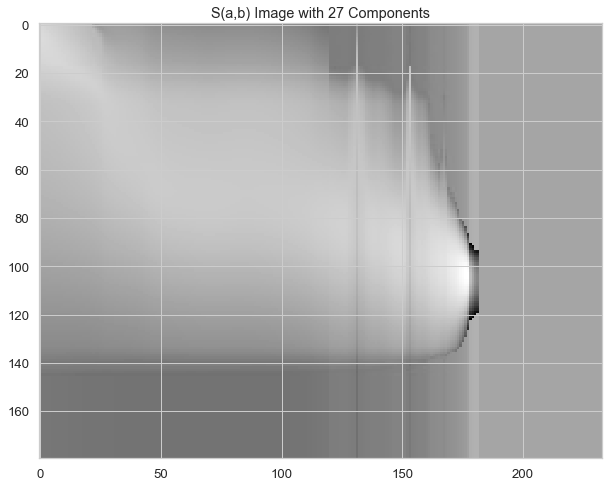

In [23]:
plt.figure(figsize=[12,8])
plt.title('True S(a,b) Image')
plt.imshow(std_scaled_x,cmap = plt.cm.gray)

print(std_scaled_x.min())
print(std_scaled_x.max())

ipca = IncrementalPCA(n_components=k)
image_recon = ipca.inverse_transform(ipca.fit_transform(std_scaled_x))



plt.figure(figsize=[12,8])
plt.title('S(a,b) Image with '+str(k)+' Components')
plt.imshow(image_recon,cmap = plt.cm.gray)

print(image_recon.min())
print(image_recon.max())


# print(min(std_scaled_x).all())

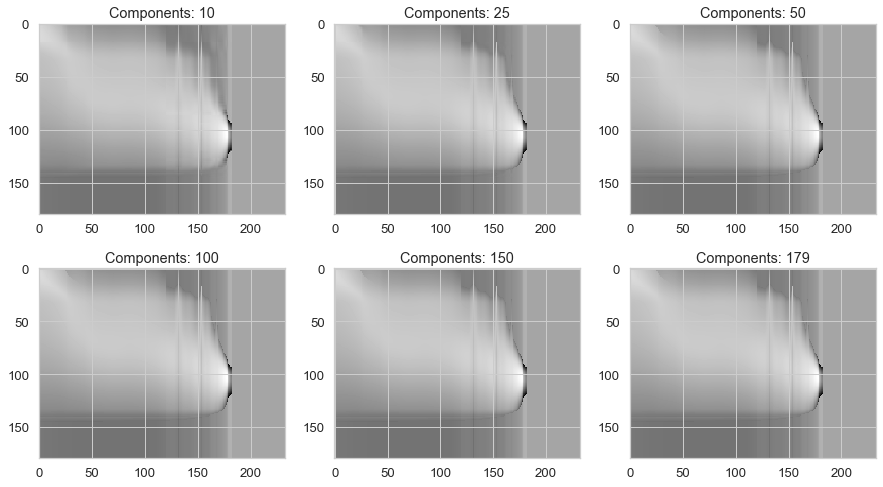

In [24]:
def plot_at_k(k):
    ipca = IncrementalPCA(n_components=k)
    image_recon = ipca.inverse_transform(ipca.fit_transform(std_scaled_x))
    plt.imshow(image_recon,cmap = plt.cm.gray)


ks = [10, 25, 50, 100, 150, 179]

plt.figure(figsize=[15,9])

for i in range(6):
    plt.subplot(2,3,i+1)
    plot_at_k(ks[i])
    plt.title("Components: "+str(ks[i]))

plt.subplots_adjust(wspace=0.2, hspace=0.0)
plt.show()


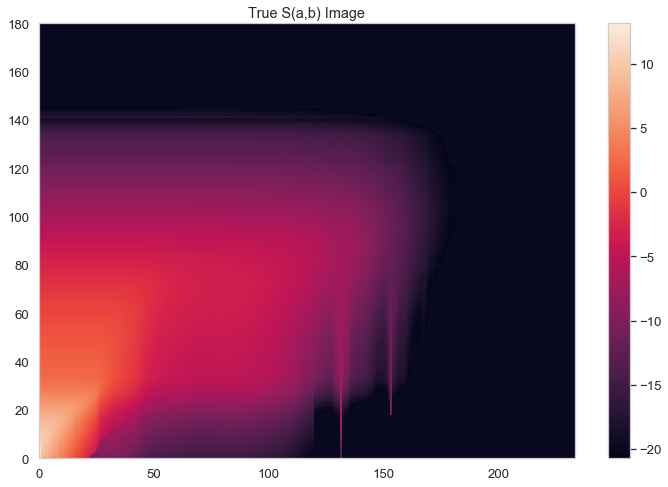

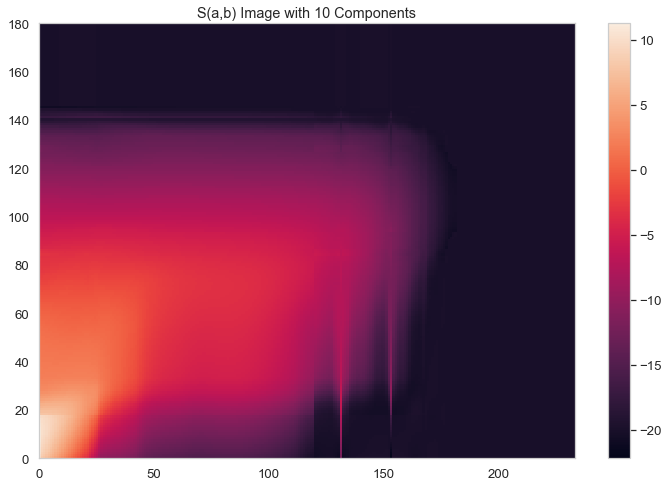

In [27]:
plt.figure(figsize=[12,8])
plt.title('True S(a,b) Image')
# plt.imshow(x,cmap = plt.cm.gray)
scaled_back = scaler.inverse_transform(std_scaled_x)
# plt.pcolor(scaled_back, norm=LogNorm(vmin=1e-20, vmax=maxSAB))#, cmap='PuBu_r')
plt.pcolor(scaled_back)#, cmap='PuBu_r')
plt.colorbar()



k = 10

ipca = IncrementalPCA(n_components=k)
image_recon = ipca.inverse_transform(ipca.fit_transform(std_scaled_x))
scaled_back = scaler.inverse_transform(image_recon)

plt.figure(figsize=[12,8])
plt.title('S(a,b) Image with '+str(k)+' Components')
# plt.imshow(image_recon,cmap = plt.cm.gray)
plt.pcolor(scaled_back)#, cmap='PuBu_r')
# plt.pcolor(scaled_back, norm=LogNorm(vmin=1e-20, vmax=maxSAB))#, cmap='PuBu_r')
plt.colorbar()

